In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/kimginam/Kaggle/DATA/multipleChoiceResponses.csv', encoding = "ISO-8859-1")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


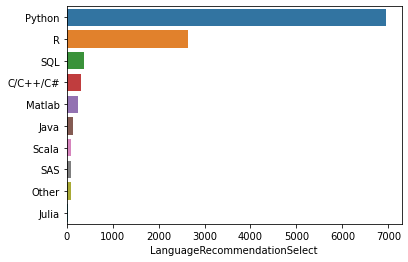

In [3]:
s = df['LanguageRecommendationSelect'].value_counts().head(10)
sns.barplot(y=s.index, x=s)

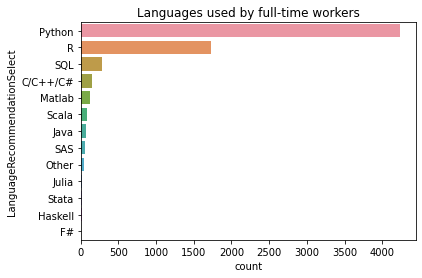

In [4]:
w = df[(df['EmploymentStatus'] == 'Employed full-time')]
plt.title("Languages used by full-time workers")
sns.countplot(y='LanguageRecommendationSelect', data = w, order=w['LanguageRecommendationSelect'].value_counts().head(15).index)

In [6]:
df['LearningPlatformSelect'] = df['LearningPlatformSelect'].astype('str').apply(lambda x : x.split(','))

s = df.apply(lambda x : pd.Series(x['LearningPlatformSelect']),axis =1).stack().reset_index(level = 1, drop=True)
s = s[s != 'nan'].value_counts().head(10)

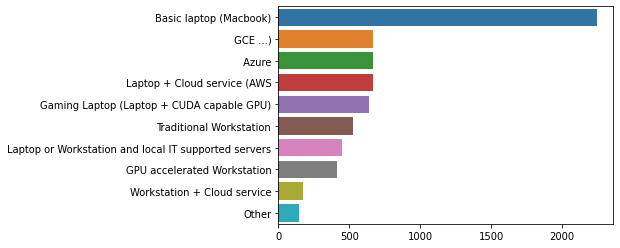

In [7]:
df['HardwarePersonalProjectsSelect'] = df['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x: x.split(','))

d = df.apply(lambda x: pd.Series(x['HardwarePersonalProjectsSelect']),axis=1).stack().reset_index(level=1, drop=True)
d = d[d != 'nan'].value_counts().head(15)
sns.barplot(y=d.index, x=d)

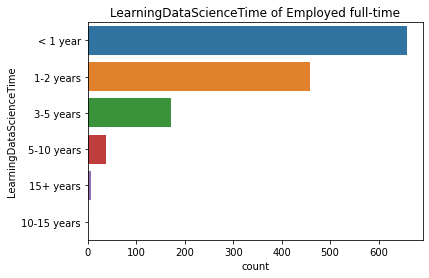

In [8]:
j = df[df['EmploymentStatus'] == 'Employed full-time']
plt.title('LearningDataScienceTime of Employed full-time')
sns.countplot(y=j.LearningDataScienceTime, order=j['LearningDataScienceTime'].value_counts().head(10).index)

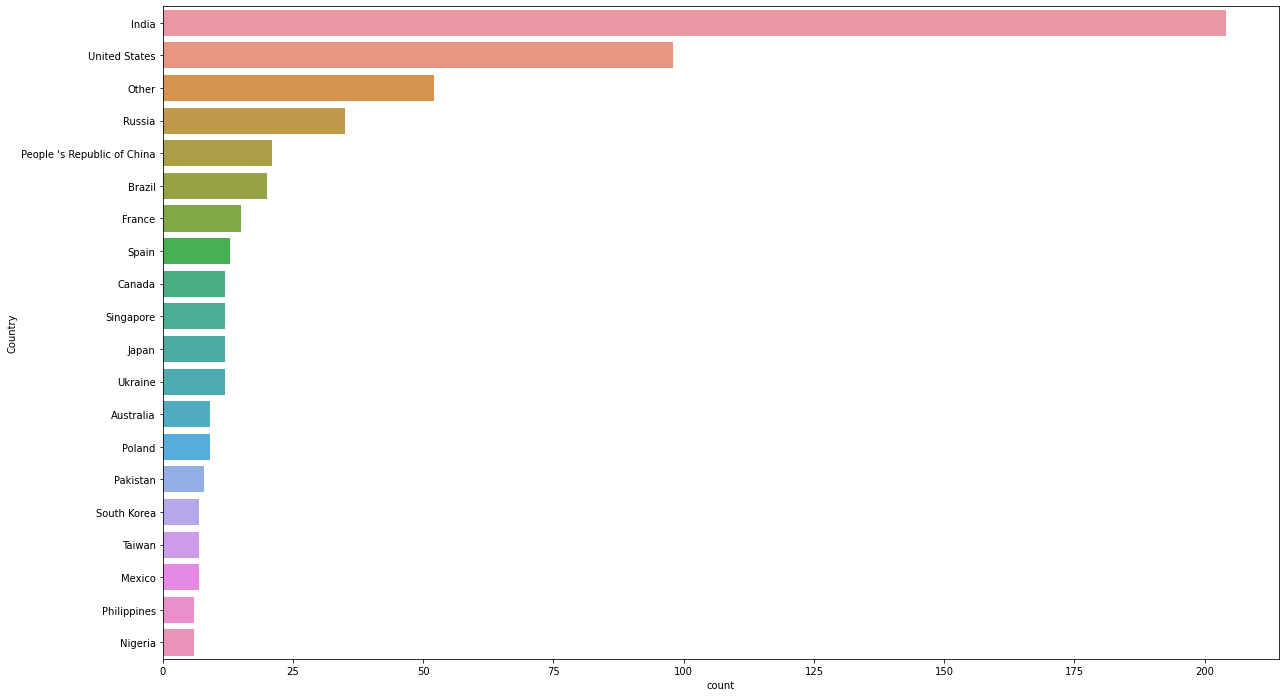

In [9]:
g = df[(df['EmploymentStatus'] == 'Employed full-time') & 
      (df['LearningDataScienceTime'] == '< 1 year')]
plt.figure(figsize=(20,12))
sns.countplot(y=g.Country, order=g['Country'].value_counts().head(20).index)